# Import libraries

In [ ]:
import numpy as np  # Imports the NumPy library for numerical operations
import pandas as pd  # Imports the pandas library for data manipulation
import seaborn as sns  # Imports the seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Imports the pyplot module for MATLAB-like plotting

from sklearn import datasets  # Imports datasets from scikit-learn for testing algorithms
from sklearn.model_selection import train_test_split  # Function to split data into train and test sets
from sklearn.neighbors import KNeighborsClassifier  # Imports the K-nearest neighbors classifier
from sklearn.svm import SVC  # Imports the support vector machine classifier for classification
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,mean_squared_error  # Imports various performance metrics


# Load the Iris dataset


In [ ]:
iris = datasets.load_iris()  # Loads the Iris dataset from scikit-learn's dataset library

X = iris.data  # Extracts the feature data (measurements) from the dataset
y = iris.target  # Extracts the target labels (species) from the dataset

# Creates a pandas DataFrame from the numpy arrays with feature data and target labels
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

In [ ]:
print("Statistical Summary:")
print(iris_df.describe()) # Print the statistical summary of the Iris DataFrame to the console. This includes count, mean, std, min, quartiles, and max.

Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
print("\nMissing Values Check:")
print(iris_df.isnull().sum()) # Print the sum of missing (null) values in each column of the iris_df DataFrame.


Missing Values Check:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Check data

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Check Feature names

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

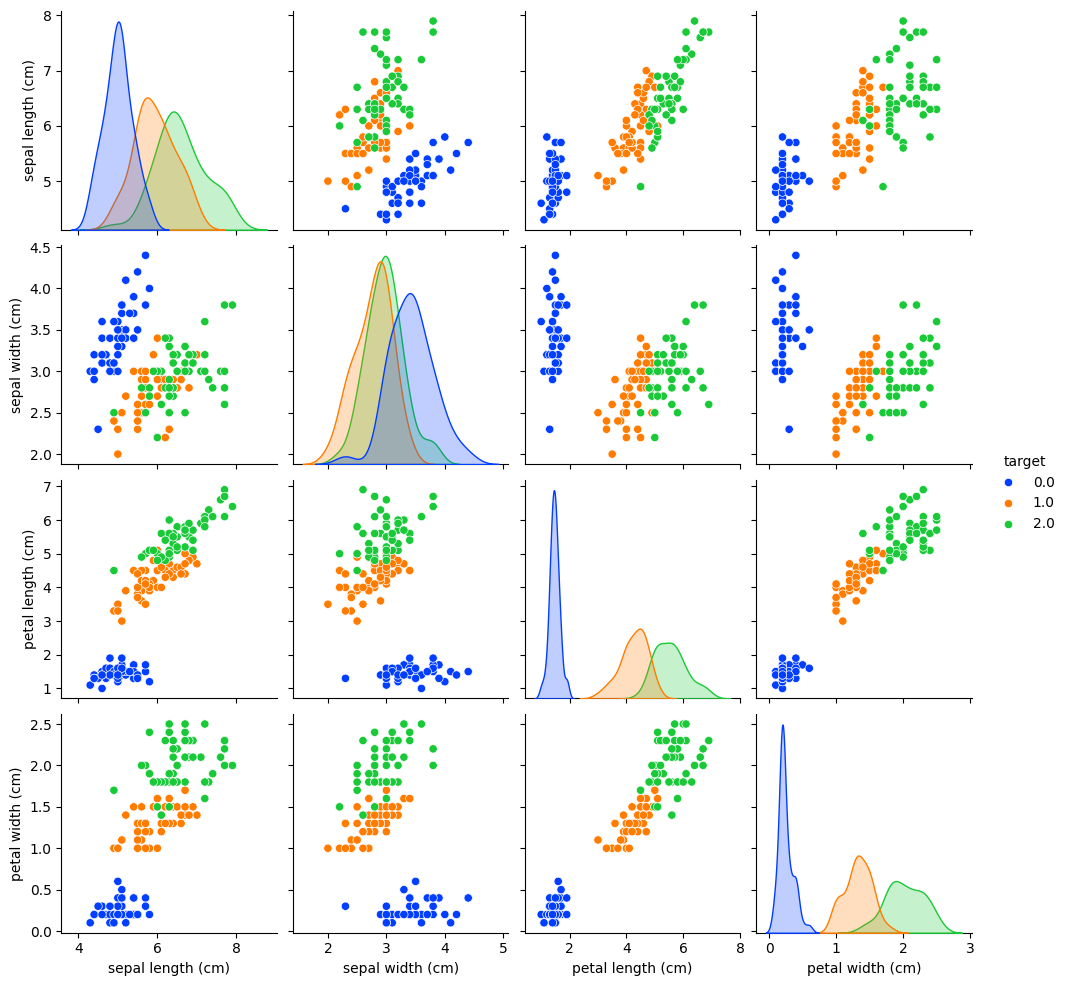

In [ ]:
sns.pairplot(iris_df, hue='target', palette='bright')
plt.show()

# Split data into training and testing sets

In [ ]:
# Splits the data into training (60%) and testing (40%) sets, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Plotting distributions of features

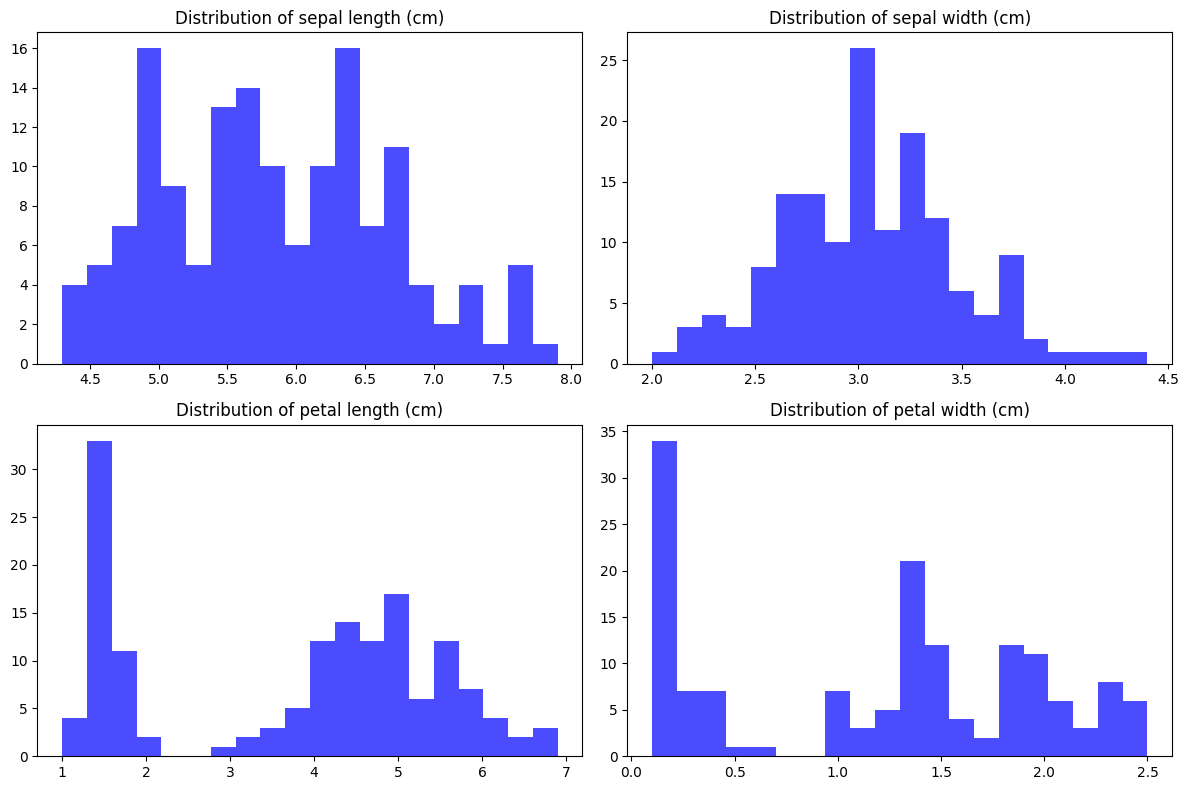

In [ ]:
plt.figure(figsize=(12, 8))  # Creates a new figure with a specified size (12 inches wide by 8 inches tall)

# Starts a loop that iterates four times, corresponding to the four features in the Iris dataset
for i in range(4):
    plt.subplot(2, 2, i + 1)  # Creates a subplot in a 2x2 grid (i+1 gives positions 1, 2, 3, and 4)
    plt.hist(X[:, i], bins=20, color='blue', alpha=0.7)  # Plots a histogram of the ith feature with 20 bins
    plt.title(f'Distribution of {iris.feature_names[i]}')  # Sets the title of each histogram to the feature's name

plt.tight_layout()  # Adjusts subplots to give some padding and prevent overlap
plt.show()  # Displays the figure with all histograms

#Model Training and Evaluation

KNN Model

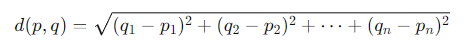

In [ ]:
# KNN Model
knn = KNeighborsClassifier()  # Initializes a K-Neighbors Classifier with default parameters
knn.fit(X_train, y_train)  # Fits the KNN model using the training data
y_pred_knn = knn.predict(X_test)  # Predicts the target values for the test data using the trained KNN model

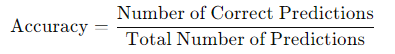

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)  # Calculates the overall accuracy of the KNN model on the test data
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)  # Generates a confusion matrix for the KNN model predictions

print("KNN Evaluation Metrics:")
print("Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", knn_conf_matrix)
print("Actual values:", y_test)
print("Predicted values:", y_pred_knn)

KNN Evaluation Metrics:
Accuracy: 0.9833333333333333
Confusion Matrix:
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
Actual values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
Predicted values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]


SVM Model


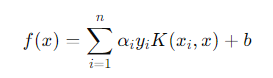

In [ ]:
# SVM Model
svm = SVC()  # Initializes a Support Vector Machine Classifier with default settings
svm.fit(X_train, y_train)  # Trains the SVM classifier using the training data. The fitting process involves finding the hyperplane that best divides a dataset into classes.
y_pred_svm = svm.predict(X_test)  # Predicts the class labels for the test dataset. The prediction is based on the hyperplanes that were determined during the training phase.

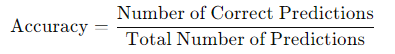

In [ ]:
# Evaluating SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm) # Calculates the overall accuracy of the SVM model on the test data
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)  # Generates a confusion matrix for the SVM model predictions

print("SVM Evaluation Metrics:")
print("Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", svm_conf_matrix)
print("Actual values:", y_test)
print("Predicted values:", y_pred_svm)

SVM Evaluation Metrics:
Accuracy: 1.0
Confusion Matrix:
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]
Actual values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
Predicted values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


Visual Comparison of Predicted and Actual Values

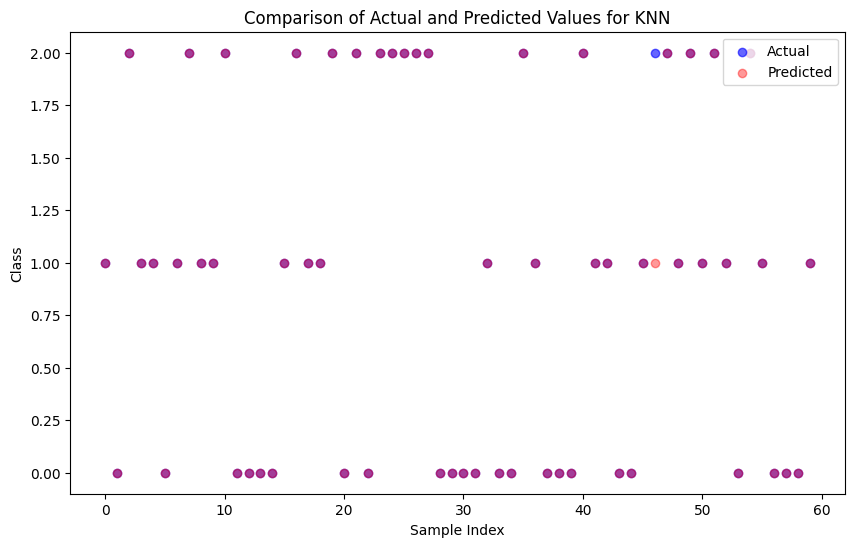

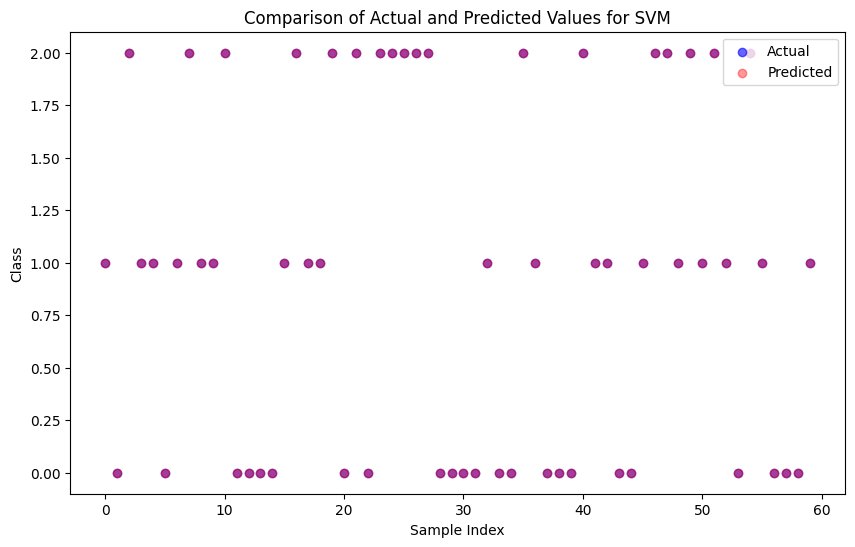

In [ ]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))  # Creates a new figure with specified dimensions (10 inches wide by 6 inches tall)
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Actual', alpha=0.6)  # Plots the actual class labels as blue points
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.4)  # Plots the predicted class labels as red points
    plt.title(f'Comparison of Actual and Predicted Values for {model_name}')  # Sets the title of the plot, including the model name
    plt.xlabel('Sample Index')  # Labels the x-axis as "Sample Index"
    plt.ylabel('Class')  # Labels the y-axis as "Class"
    plt.legend()  # Displays a legend to differentiate actual and predicted values
    plt.show()  # Displays the plot

# Plotting for KNN
plot_predictions(y_test, y_pred_knn, 'KNN')

# Plotting for SVM
plot_predictions(y_test, y_pred_svm, 'SVM')

#Error Metrics Calculation

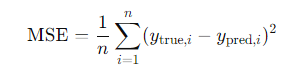 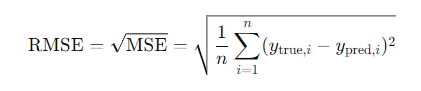

In [ ]:
knn_mse = mean_squared_error(y_test, y_pred_knn)  # Calculates the Mean Squared Error for the KNN model
knn_rmse = np.sqrt(knn_mse)  # Calculates the Root Mean Squared Error for the KNN model by taking the square root of MSE

svm_mse = mean_squared_error(y_test, y_pred_svm)  # Calculates the Mean Squared Error for the SVM model
svm_rmse = np.sqrt(svm_mse)  # Calculates the Root Mean Squared Error for the SVM model by taking the square root of MSE

# Print the results for KNN
print("KNN Mean Squared Error (MSE):", knn_mse)
print("KNN Root Mean Square Error (RMSE):", knn_rmse)

# Print the results for SVM
print("SVM Mean Squared Error (MSE):", svm_mse)
print("SVM Root Mean Square Error (RMSE):", svm_rmse)

KNN Mean Squared Error (MSE): 0.016666666666666666
KNN Root Mean Square Error (RMSE): 0.12909944487358055
SVM Mean Squared Error (MSE): 0.0
SVM Root Mean Square Error (RMSE): 0.0


#Comparison

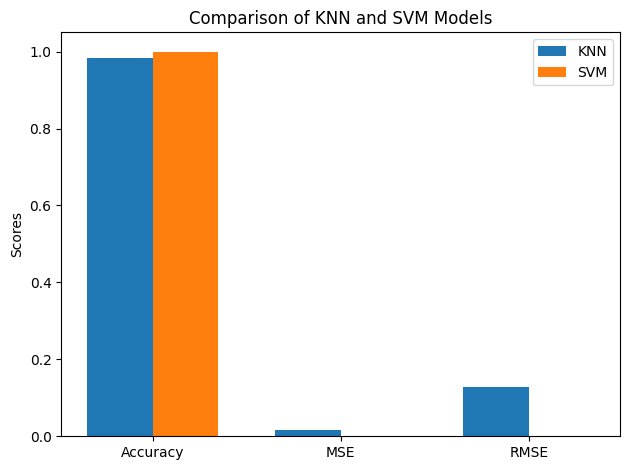

In [ ]:
# Function to plot comparisons
def plot_comparison(metric_knn, metric_svm, title):
    labels = ['Accuracy','MSE','RMSE']  # Names of the metrics to be plotted
    x = np.arange(len(labels))  # the label locations on the x-axis
    width = 0.35  # the width of each bar in the bar chart

    fig, ax = plt.subplots()  # creates a new figure and a set of subplots
    rects1 = ax.bar(x - width/2, metric_knn, width, label='KNN')  # bars for KNN metrics
    rects2 = ax.bar(x + width/2, metric_svm, width, label='SVM')  # bars for SVM metrics

    ax.set_ylabel('Scores')  # sets the y-axis label
    ax.set_title(title)  # sets the title of the chart
    ax.set_xticks(x)  # sets the locations of the x-axis ticks
    ax.set_xticklabels(labels)  # sets the labels of the x-axis ticks
    ax.legend()  # adds a legend to differentiate between KNN and SVM

    fig.tight_layout()  # adjusts subplots to fit into the figure area

    plt.show()  # displays the plot

# Call the function with metrics
metrics_knn = [knn_accuracy,knn_mse, knn_rmse]
metrics_svm = [svm_accuracy,svm_mse, svm_rmse]
plot_comparison(metrics_knn, metrics_svm, 'Comparison of KNN and SVM Models')

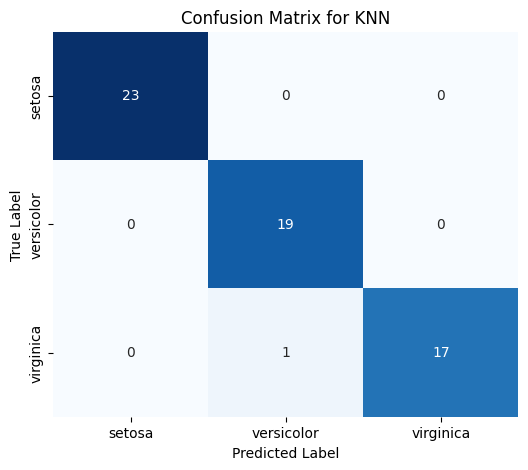

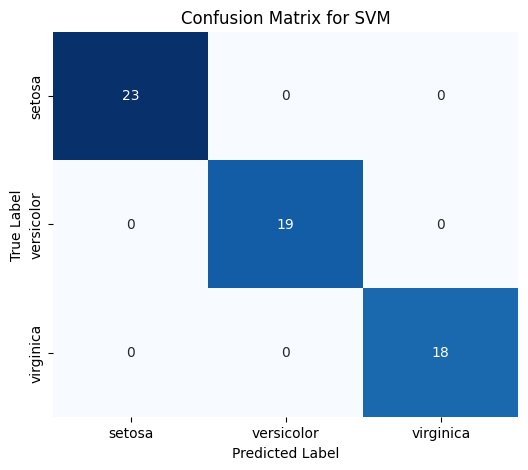

In [ ]:
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(6, 5))  # Sets up a figure with specific dimensions (6 inches wide by 5 inches tall)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    # Plots the confusion matrix using seaborn's heatmap function:
    #   - cm: the confusion matrix data
    #   - annot: True enables annotation within each cell of the heatmap showing the integer data
    #   - fmt: 'd' formats the annotated data as integers
    #   - cmap: 'Blues' sets the color map of the heatmap to shades of blue
    #   - cbar: False disables the color bar on the side
    #   - xticklabels and yticklabels: these arguments set the labels for the x-axis and y-axis respectively

    plt.xlabel('Predicted Label')  # Labels the x-axis
    plt.ylabel('True Label')  # Labels the y-axis
    plt.title(f'Confusion Matrix for {title}')  # Sets the title of the heatmap
    plt.show()  # Displays the plot

# Plotting confusion matrices for both models
plot_confusion_matrix(knn_conf_matrix, 'KNN', iris.target_names)
plot_confusion_matrix(svm_conf_matrix, 'SVM', iris.target_names)